# Vollständige _Explorative Data Analysis_ (EDA) zu der Datenbasis der Masterarbeit 

Folgende Datensätze wurden erhoben und erstellt: 
- Basale PI-Daten mit aggregierten Kennzahlen 
- Publikationsdaten im Zeitraum 2015-2025
- Drittmitteldaten im Zeitraum 2015-2025

Folgende Ergebnisse aus der Zusammenstellung und Analyse können hier zusammengefasst werden. Die Details dazu sind diesem Notebook zu entnehmen: 
|               | Quelle(n)                                                                                     | Anzahl Datensätze insgesamt | Anzahl verwendeter Datensätze | Features und Feature Engineering | Bemerkungen |
|---------------|:-----------------------------------------------------------------------------------------------|:-----------------------------|:-------------------------------|:----------------------------------|:-------------|
| **PI Basics**     | Der Umfang der PIs bestimmt sich aus den Drittmitteldaten im Zeitraum von 2015-2025. Die Stammdaten wurden weitestgehend manuell zusammengetragen; die Kennzahlen wurden aggregiert. | Es liegen 43 Datensätze mit personenbezogenen und KPI-Features vor | Alle Datensätze können verwendet werden | - name<br>- first_name<br>- pi_id<br>- scholar_id<br>- s2_id<br>- start_date<br>- end_date<br>- citation_count<br>- publication_count<br>- third_party_count<br>- h_index<br>- tpf_count<br>- tpf_amount | Die Datensätze zu den PIs sind zu einem großen Teil manuell erhoben durch Internetrecherche etc.; die KPIs dagegen stammen von einschlägigen Portalen (Google Scholar, S2, PubMed) und wurden aggregiert. |
| **Publikationen** | - Google Scholar via SerpAPI <br>- Semantic Scholar via API<br>- PubMed via Python Scraping-Library  | - Google Scholar: Insgesamt liegen etwa 2000 Datensätze mit 3 Features vor<br>- Semantic Scholar: Insgesamt liegen etwa 1900 Datensätze mit 5 Features vor<br>- PubMed: Insgesamt liegen etwa 1600 Datensätze mit 5 Features vor | Google Scholar wurden wegen unzureichender Datenqualität ausgeschlossen; nach einem umfassenden Preprocessing konnten die Datensätze von PubMed und Semantic Scholar genutzt werden:<br>- PubMed: 1400 Datensätze<br>- Semantic Scholar: 900 Datensätze | - pi<br>- title<br>- year<br>- keywords<br>- abstract | Da viele Autoren aus dem FB gemeinsam publizieren, gab es einige Doppelungen |
| **Drittmittel**   | Internes CRIS | Es liegen etwa 900 Datensätze vor | Verwendet werden können nach einem umfassenden Preprocessing etwa 400 Datensätze | - pi<br>- title<br>- funding_organization<br>- start_year<br>- end_year<br>- keywords<br>- abstracts<br>- funding_amount | Die Daten aus den beiden Quellen konnten _nicht_, auch nicht mit _fuzzy matching_, gemerged werden und werden deshalb getrennt verwendet, was aber in Bezug auf die Intention der folgenden Analysen und Modellierungen nicht schädlich ist. |

### Quellen
Das Vorgehen für diese EDA ist im Wesentlichen der Standardprozess jeder EDA in Python, so wie es etwa in den folgenden Quellen umfassend nachgelesen werden kann: 
- [Online Medium Artikel zu EDA](https://medium.com/@nomannayeem/mastering-exploratory-data-analysis-eda-a-comprehensive-python-pandas-guide-for-data-insights-c0be7c5b8889)
- Monographie von Hodeghatta, U. R., & Nayak, U. (2023). Practical Business Analytics Using R and Python: Solve Business Problems Using a Data-driven Approach, 2nd Edition (2nd Edition). Apress. https://doi.org/10.1007/978-1-4842-8754-5, **insb. Kapitel 5**
- Monographie von Cleve, J., & Lämmel, U. (2024). Data Mining: Datenanalyse für Künstliche Intelligenz (4th edition.). De Gruyter. https://doi.org/10.1515/9783111387703, **insb. Kapitel 8**
- Stellen, an denen KI zum Einsatz gekommen ist, um Code zu verbessern, sind entsprechend markiert mit **[KI]**



In [43]:
# Import der Bibliotheken 
import pandas as pd
import openpyxl
from pathlib import Path
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
import ast

# Anzeigeoptionen für die Ausgaben einstellen 
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 20)
pd.set_option("display.width", 150)


## 1. PI Basics

### Angaben zu den Wissenschaftler*innen


In [44]:
# Pfade relativ definieren 
curr_folder = Path.cwd()

# Input-Pfad und -Datei
input_folder = curr_folder.parent / r"01_data\01_csv_data\00_pi_basics"

if input_folder.exists(): 
    print("Ordner mit den PI-Daten ist vorhanden.")
    pi_file = input_folder / r"FINALLY_ALL_pi_data.csv"
else: 
    print("Ordner mit den PI-Daten ist nicht vorhanden, wird jetzt erstellt...")
    input_folder.mkdir()
    print("Ordner wurde erstellt.")
    pi_file = input_folder / r"FINALLY_ALL_pi_data.csv"

# Output-Pfad
out_dir = curr_folder.parent / r"01_data\06_full_eda"

if out_dir.exists(): 
    print("Ordner für die Ablage der Auswertungen ist vorhanden.")
else: 
    print("Ordner für die Ablage der Auswertungen ist nicht vorhanden, wird jetzt erstellt...")
    out_dir.mkdir()
    print("Ordner wurde erstellt.")
    
# Pfade zu den Publikationsdaten 
folder_pubmed = curr_folder.parent / r"01_data\01_csv_data\99_pubmed"
folder_google = curr_folder.parent / r"01_data\01_csv_data\01_publications"
folder_semantic = curr_folder.parent / r"01_data\01_csv_data\98_s2"

# Pfade zu den Drittmitteldaten 
folder_tpf = curr_folder.parent / r"01_data\01_csv_data"

# Einlesen der CSV-Datei in einen Dataframe
df = pd.read_csv(pi_file, 
                 sep=",", 
                 usecols=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],
                 encoding="utf-8", 
                 index_col=False)

print("\n Erste Ansicht des Dataframe:\n")
print(df.head())

print("\n", "Spalten des Df:\n", df.columns.tolist())

Ordner mit den PI-Daten ist vorhanden.
Ordner für die Ablage der Auswertungen ist vorhanden.

 Erste Ansicht des Dataframe:

   Unnamed: 0  pi_id       scholar_id      s2_id  vorname       nachname      nach_und_vorname institute  \
0           0      1  yyFiRMQAAAAJ&hl    1692564   Helene        Richter        Helene Richter      invb   
1           1      2  nNJGrYIAAAAJ&hl  145491092   Jochen         Schmid         Jochen Schmid      immb   
2           2      3     über Website  144945538    Bruno  Moerschbacher   Bruno Moerschbacher      ibbp   
3           3      4     tr_C50oAAAAJ    3725749   Stefan       Luschnig       Stefan Luschnig      invb   
4           4      5     DtFvIgEAAAAJ   48411399  Nicolas         Rohner        Nicolas Rohner      iizp   

                                    research_summary  start_date end_date  s2_citations  h_index  publikationen_gesamt  drittmittel_gesamt  \
0  Researches behavioral biology and animal welfa...  2017-02-01     3000          1

In [45]:
# Weitere Basisangaben zum Df

print("Allgemeine Informationen:\n")
print(df.info())
print(80*"==", "\n")
print("Erste statistische Auswertung der agggregierten Kennzahlen:\n")
print(df[["s2_citations", "h_index", "publikationen_gesamt", "drittmittel_gesamt", "drittmittel_volumen"]].describe().T)


Allgemeine Informationen:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            44 non-null     int64  
 1   pi_id                 44 non-null     int64  
 2   scholar_id            44 non-null     object 
 3   s2_id                 44 non-null     int64  
 4   vorname               44 non-null     object 
 5   nachname              44 non-null     object 
 6   nach_und_vorname      44 non-null     object 
 7   institute             44 non-null     object 
 8   research_summary      44 non-null     object 
 9   start_date            44 non-null     object 
 10  end_date              44 non-null     object 
 11  s2_citations          44 non-null     int64  
 12  h_index               44 non-null     int64  
 13  publikationen_gesamt  44 non-null     int64  
 14  drittmittel_gesamt    44 non-null     int64  
 15

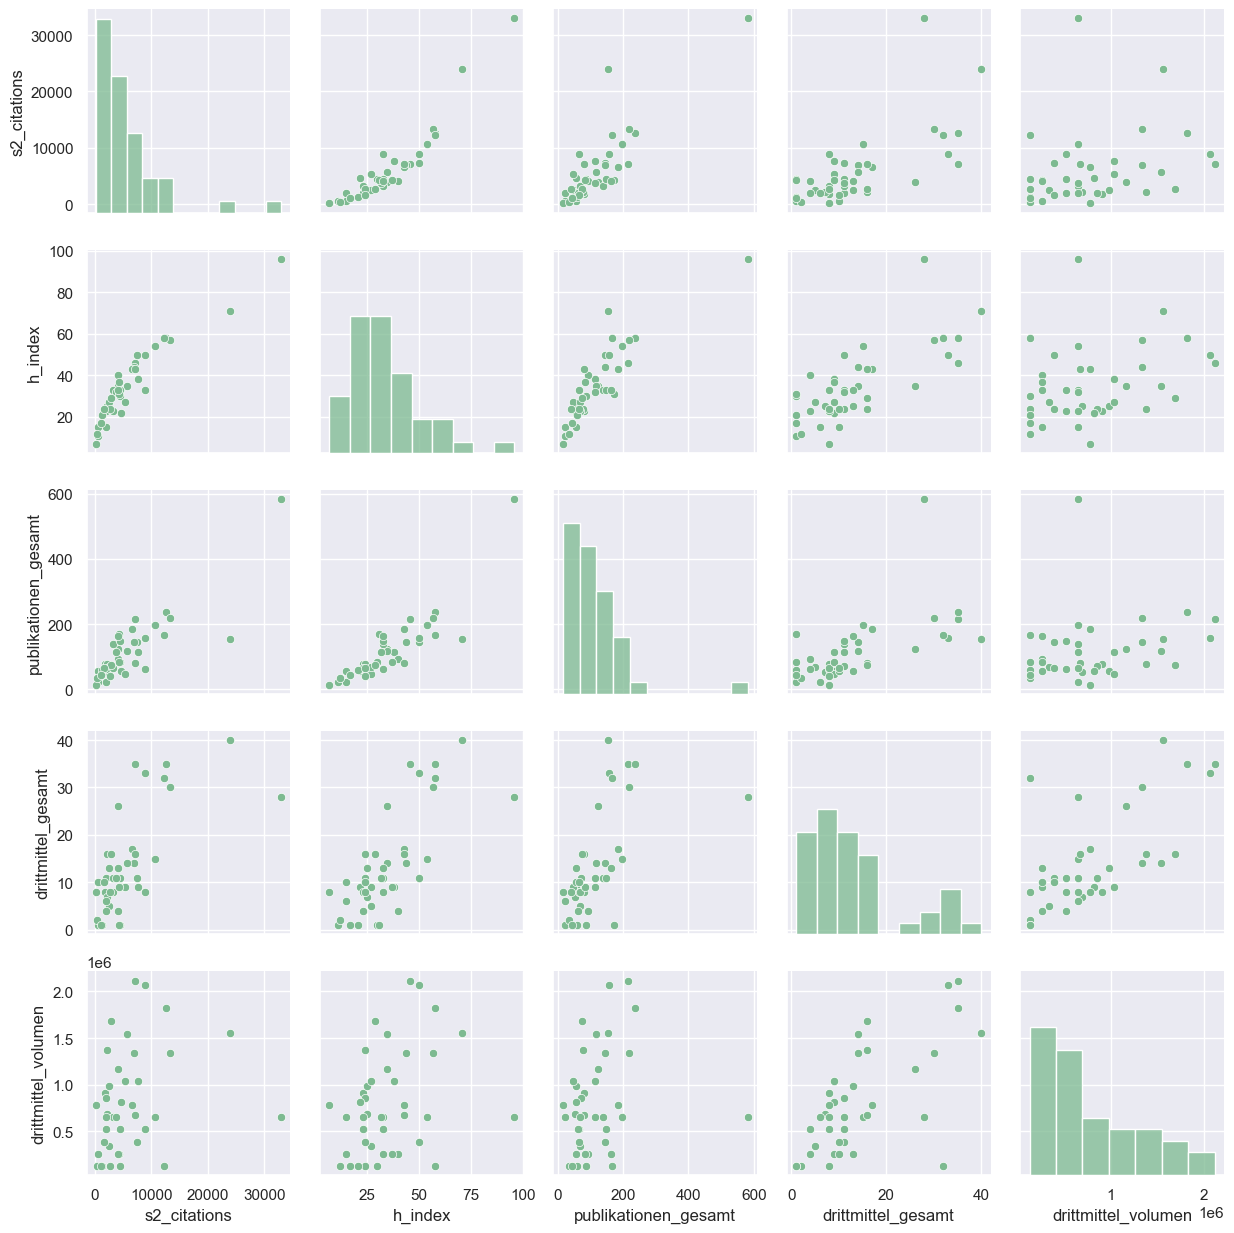

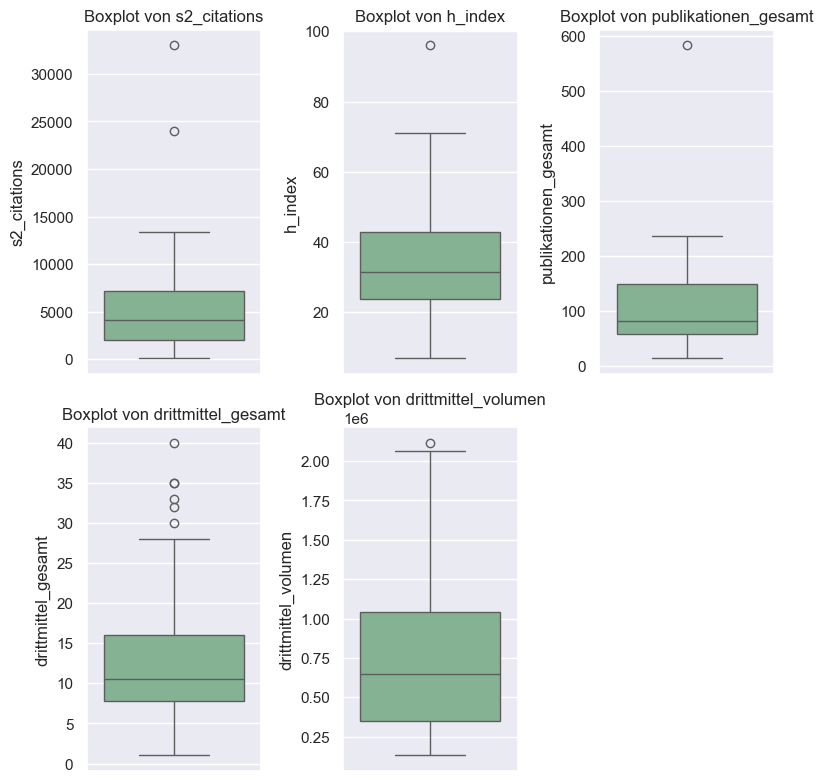

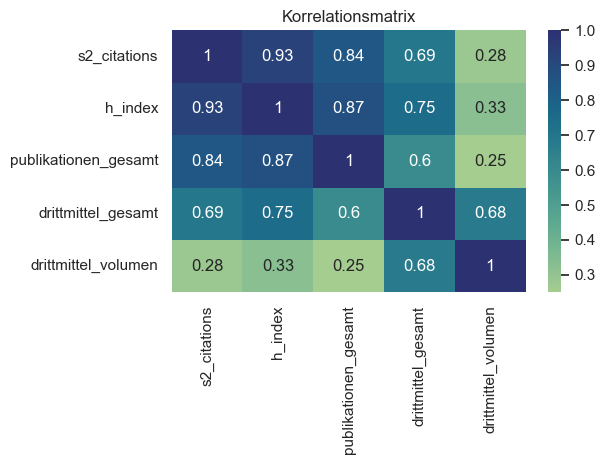

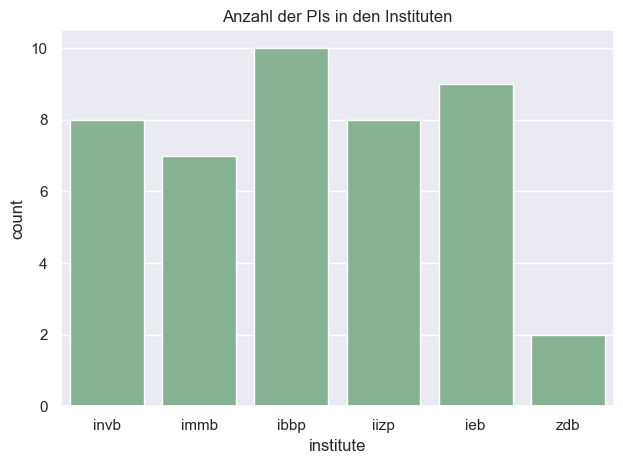

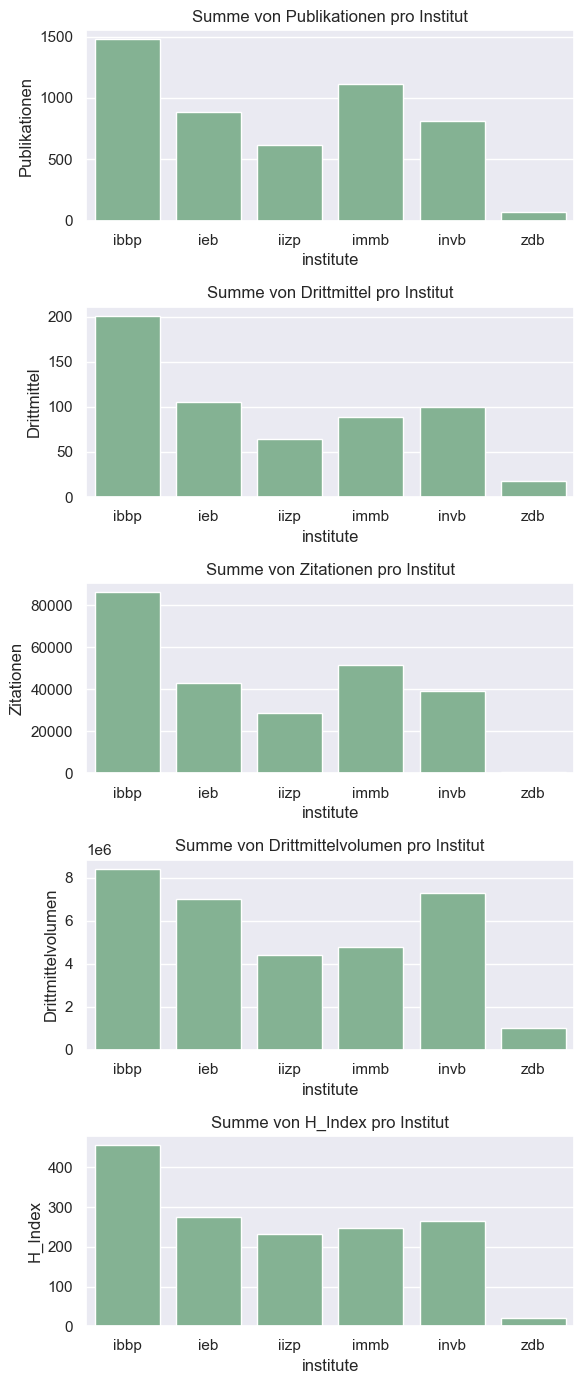

In [46]:
# Der Df ist durch einen manuellen Datenübertrag und einige Iterationsschleifen, die im Projektordner im Bereich _02_scripts_models_ nachgesehen werden können 
# schon so erstellt, dass es keine fehlenden Werte oder Duplikate gibt. Es folgt daher direkt die Visualisieurng einiger Features.

# Farbpalette einstellen
sns.set_theme(palette="crest")

# Pairplot
sns.pairplot(data= df[["s2_citations", "h_index", "publikationen_gesamt", "drittmittel_gesamt", "drittmittel_volumen"]])
#plt.title("Pairplot der numerischen Spalten")
plt.tight_layout()
plt.savefig(out_dir / "eda_pairplot.png")
plt.show()

# Boxplots 
fig, axes = plt.subplots(2, 3, figsize=(8, 8))
axes_flat = axes.flatten()
col_list = ["s2_citations", "h_index", "publikationen_gesamt", "drittmittel_gesamt", "drittmittel_volumen"]
for i, name in enumerate(col_list):
    sns.boxplot(data=df, y=name, ax=axes_flat[i])
    axes_flat[i].set_title(f"Boxplot von {name}")
plt.title("Boxplots der numerischen Spalten")
fig.delaxes(axes_flat[5])
plt.tight_layout()
plt.savefig(out_dir / "eda_boxplots.png")
plt.show()

# Korrelationsmatrix
df_corr = df[["s2_citations", "h_index", "publikationen_gesamt", "drittmittel_gesamt", "drittmittel_volumen"]]
corr_matrix = df_corr.corr(numeric_only=True)
sns.heatmap(corr_matrix, cmap="crest", annot=True)
plt.title("Korrelationsmatrix")
plt.tight_layout()
plt.savefig(out_dir / "eda_corr_matrix.png")
plt.show()

# Verteilung über die sechs Institute 
sns.countplot(data=df, x="institute")
plt.title("Anzahl der PIs in den Instituten")
plt.tight_layout()
plt.savefig(out_dir / "eda_count_pi_per_institute.png")
plt.show()

# Df für die Plots nach Instituten vorbereiten 
df_ins = df.groupby("institute").agg(
    Publikationen=("publikationen_gesamt", "sum"),
    Drittmittel=("drittmittel_gesamt", "sum"),
    Zitationen=("s2_citations", "sum"), 
    Drittmittelvolumen=("drittmittel_volumen", "sum"),
    H_Index=("h_index", "sum")
)
df_ins_df = df_ins.reset_index()
#print(df_ins_df)

fig1, axes1 = plt.subplots(5, figsize=(6, 14))
axes_flat1 = axes1.flatten()
col_list1 = ["Publikationen", "Drittmittel", "Zitationen", "Drittmittelvolumen", "H_Index"]
for i, name in enumerate(col_list1):
    sns.barplot(data=df_ins_df, x="institute", y=name, ax=axes_flat1[i], estimator="sum")
    axes_flat1[i].set_title(f"Summe von {name} pro Institut")
plt.tight_layout()
plt.savefig(out_dir / "eda_counts_allVariables_per_institute.png")
plt.show()


## 2. Publikationen

### Angaben zu den Publikationen aus den verschiedenen Quellen 

Die Publikationen wurden aus verschiedenen Quellen gezogen -- mit je unterschiedlichen Vor- und Nachteilen:

|   | Vorteile | Nachteile | Ausgewählt |
| -- | ---- | ---- | ---- |
| Google Scholar | - die umfassendsten Ergebnisse in der Abdeckung der PIs | - jedwede Art von Publikation wird erfasst <br>- es gibt keine off. API und Web Scraping ist untersagt (man muss auf bestimmte Anbieter zurückgreifen, hier SerpAPI) | Aufgrund der fehlenden API nicht verwendet |
| PubMed | - umfassende Ergebnisse in der Abdeckung der PIs <br>- man kann off. die Daten in guter Qualität scrapen | - nicht alle PIs haben eine Autorenseite, sodass andere Quellen ergänzend hinzugezogen werden müssen | Aufgrund der insgesamt sehr guten Qualität und Quantität der Daten wurden sie für die Analysen ausgewählt (in Ergänzung mit Semantic Scholar) |
| Semantic Scholar | - umfassende, aber teilweise unterdurchschnittliche Ergebnisse in der Abdeckung der PIs <br>- man kann off. die Daten in guter Qualität über eine API scrapen | - nicht alle PIs haben eine Autorenseite, sodass andere Quellen ergänzend hinzugezogen werden müssen | Aufgrund der insgesamt sehr guten Qualität und Quantität der Daten wurden sie für die Analysen ausgewählt (in Ergänzung mit PubMed) |


In [47]:
# Daten einlesen

# Da die Publikationsdaten jeweils pro PI gefetcht und in einer separaten csv gespeichert wurden, 
# muss zunächst ein konkatenierter Dataframe erstellt werden.  

def concat_csv_folder(path: str, delimiter: str = ";", name: str = None) -> pd.DataFrame:
    """
    Diese Hilfsfunktion erstellt einen konkatenierten Dataframe aus allen CSV-Dateien in einem Ordner und gibt erste Einsichten in den Df.

    Args: 
    - path (str) = Der Pfad zu dem Odner mit den CSV-Dateien. 
    - name (str, optional) = Gibt dem Df einen Namen, um ihn von anderen zu unterscheiden. 

    Returns: 
    - Gibt einen Df zurück. 
    """

    from pathlib import Path
    
    folder = Path(path)
    file_list = [pd.read_csv(x, sep=delimiter, encoding="utf-8", engine="python") for x in folder.glob("*.csv")]
    print(f"Anzahl der gefundenen Dateien in {name}: {len(file_list)}.\n")
    df = pd.concat(file_list, axis=0, ignore_index=True) 

    print("Erste Zeilen von {}:\n".format(name))
    print(df.head(5))
    print(80*"=")
    print("Allgemeine Informationen {}:\n".format(name))
    df.info()
    print(80*"=") 
    
    try:
        print("Erste statistische Auswertung {}:\n\n {}".format(name, df.describe(include="object").T))
    except Exception as e:
        print(f"Fehler {e}.")
    finally: 
        print(140*"=")
        
    if name == "PubMed":
        try: 
            print(f"Prüfung der Anzahl der inkludierten PIs (44) bei {name}: {df['source'].nunique()}.")
            print("Individuen:")
            print(df['source'].unique())
        except Exception as e: 
            print(f"Fehler {e}.")
        finally:
            print(140*"=")
            print(140*"=")

    return df

###########################################################
# Funktion für die drei Datenbasen aufrufen 
###########################################################
dfs={}
for a, x, y, z in [("df_pubmed", folder_pubmed, ",", "PubMed"),
            ("df_s2", folder_semantic, ";", "Semantic Scholar"), 
            ("df_google", folder_google, ";", "Google Scholar")]:
    dfs[a] = concat_csv_folder(x,y,z)


Anzahl der gefundenen Dateien in PubMed: 43.

Erste Zeilen von PubMed:

   source                                              title                                           keywords publication_date  \
0  Amunts      CryoAtom improves model building for cryo-EM.                                                 []       2025-11-15   
1  Amunts  Mettl15-Mettl17 modulates the transition from ...  ['Trypanosoma', 'biogenesis', 'cryo-EM', 'meth...       2025-08-30   
2  Amunts  The mitochondrial methylation potential gates ...                                                 []       2025-06-26   
3    Berg  Pseudomonadal itaconate degradation gene clust...                                                 []       2025-07-25   
4    Berg      Editorial: The metabolic pathways of archaea.  ['ammonia-oxidizing archaea', 'archaea', 'geno...       2025-07-23   

                                          co_authors                                           abstract  Unnamed: 0 paper_id  citation_

C:\Users\felix\AppData\Local\Temp\ipykernel_15244\4033925833.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(file_list, axis=0, ignore_index=True)


Anzahl der gefundenen Dateien in Google Scholar: 31.

Erste Zeilen von Google Scholar:

   Unnamed: 0                                              title                                               link                citation_id  \
0           0       CryoAtom improves model building for cryo-EM  https://scholar.google.com/citations?view_op=v...  xuCj4F8AAAAJ:3s1wT3WcHBgC   
1           1  Structure of Photosystem I with SOD reveals co...  https://scholar.google.com/citations?view_op=v...  xuCj4F8AAAAJ:pqnbT2bcN3wC   
2           2  The mitochondrial methylation potential gates ...  https://scholar.google.com/citations?view_op=v...  xuCj4F8AAAAJ:ZHo1McVdvXMC   
3           3  Human ribosome interactions reframe neomycin t...  https://scholar.google.com/citations?view_op=v...  xuCj4F8AAAAJ:g5m5HwL7SMYC   
4           4  Mettl15-Mettl17 modulates the transition from ...  https://scholar.google.com/citations?view_op=v...  xuCj4F8AAAAJ:M05iB0D1s5AC   

                                   

In [48]:
# Basierend auf der ersten Exploration der Datenstrukturen der verschiedenen Quellen werden folgende Schritte durchgeführt:
# 1. Check auf Duplikate und fehlende Werte, 
# 2. Anpassung des Features "publication_date" für alle drei Quellen, weil sie sehr unterschiedlich formatiert waren, und 
# 3. Extraktion der Co-Autoren in einen eigenen Df. 

# Funktion definieren 
def cols_duplicates_co_authors(df: pd.DataFrame, name: str = None) -> pd.DataFrame: 
    """
    Diese Funktion führt multiple Schritte aus:  
    1. Sie erstellt einige weitere Informationen zu Duplikaten und fehlenden Werten und bereinigt den Df entsprechend.
    2. Sie transformiert die Datumsangaben der Publikationen in reine Jahreszahlen und gibt den Df zurück 
    3. Sie gibt einen neuen Df mit einer Listung der Co-Autoren zurück 


    Args: 
    - df = ein Dataframe-Objekt
    - name (optional) = ein String, der den Namen des Df angibt 

    Returns: 
    - Es gibt einige Ausgaben in der Konsole, die bestimmte Kennzahlen/Überprüfungen anzeigen (s.o.)
    - Es werden zwei Dfs ausgegeben: 
      - Df1 = der ursprüngliche Df mit korrekter Jahresspalte
      - Df2 = der neu erstellte Df mit den Co-Autor:innen
    """

    # Check der korrekten Namenseingabe 
    name_list = ["PubMed", "Semantic Scholar", "Google Scholar"]
    if name not in name_list: 
        raise ValueError("Der Name muss aus der folgenden Liste stammen: {}.".format(name_list))

    #Zur Übersicht: Länge und Spaltennamen des Df
    print("Länge von {} = {}.".format(name if name else "", len(df)))
    print("Spaltennamen von {} = {}.".format(name if name else "", df.columns))
    print(140*"=")

    # Duplikate 
    print("Anzahl der Duplikate in den Titeln bei {} = {}.".format(name if name else "", df.duplicated(subset="title").sum()))
    if "abstract" in df.columns:
        print("Anzahl der Duplikate in den Abstracts bei {}= {}.".format(name if name else "", df.duplicated(subset="abstract").sum()))

    # Duplikate entfernen basierend auf dem Title-Feature 
    df = df.drop_duplicates(subset="title")

    # Fehlende Werte 
    print("Anzahl der fehlenden Werte bei {} = {}.".format(name if name else "", df.isna().sum()))
    print(140*"=")
    #print("Anzahl der fehlenden Werte in den Titeln bei {} = {}.".format(name if name else "", df.isna().sum()))
    if name != "Google Scholar":
        df = df.dropna(subset=["title","abstract"])
    elif name == "Google Scholar": 
        df = df.dropna(subset=["title"])

    # Zwischenstand ausgeben 
    print("Anzahl der verbleibenden Datensätze bei nach dem Drop von Duplikaten und fehlenden Werten bei {} = {}.".format(name if name else "", len(df)))
    print(140*"=")

    # Datumsangaben ändern 
    if name == "PubMed": 
        try: 
            df["publication_date"] = pd.to_datetime(df["publication_date"], errors="coerce")
            df["publication_year"] = df["publication_date"].dt.year
            print("Das Datumsformat wurde auf die Jahreszahl geändert.")
            print(140*"=")
        except Exception as e: 
            print(f"Fehler {e}.")
    elif name == "Semantic Scholar": 
        try: 
            df["year"] = pd.to_datetime(df["year"])
            print("Das Datumsformat wurde auf die Jahreszahl geändert.")
            print(140*"=")
        except Exception as e: 
            print(f"Fehler {e}.")
    elif name == "Google Scholar": 
        try: 
            df["year"] = pd.to_datetime(df["year"])
            print("Das Datumsformat wurde auf die Jahreszahl geändert.")
            print(140*"=")
        except Exception as e: 
            print(f"Fehler {e}.")  

    #Co-Autoren-Df erstellen 
    if name == "PubMed": 
        try:  
            all = [] 
            for row in df[["source", "co_authors"]].itertuples(index=False):
                pi_name = row.source 
                authors_list = row.co_authors
                authors_list_l = ast.literal_eval(authors_list)
                dfx = pd.json_normalize(authors_list_l) 
                dfx.insert(0, "source", pi_name)
                all.append(dfx)
            final = pd.concat(all, axis=0, ignore_index=True)  
            print("Anzahl aller Co-Autoren = {}.".format(len(final)))
            print(140*"=")
            print("Nächster Datensatz folgt.")
            print(140*"=")
        except Exception as e: 
            print(f"Fehler {e}.")
            
    elif name == "Semantic Scholar": 
        alle = []
        try: 
            for row in df[["authors"]].itertuples(index=False):
                namen = ast.literal_eval(row.authors)
                #print(namen)
                for voller_name in namen:
                    teile = voller_name.split(" ")
                    alle.append(teile[-1])
            #print(alle)
            final = pd.DataFrame(alle)
            print("Anzahl aller Co-Autoren = {}.".format(len(final)))
            print(140*"=")
            print("Nächster Datensatz folgt.")
            print(140*"=")
        except Exception as e: 
            print(f"Fehler {e}.")
            
    elif name == "Google Scholar": 
        all1 = []
        try: 
            for row in df[["authors"]].itertuples(index=False):
                m = row.authors.split(",")
                #print(m):
                for z in m:
                    a = z.strip()
                    a = a.replace("...", "")
                    #print(type(a))
                    b = a.rsplit(" ", 1)[-1]
                    all1.append(b)
            all2 = [x for x in all1 if x]
            #print(all2)
            final = pd.DataFrame(all2)
            print("Anzahl aller Co-Autoren = {}.".format(len(final)))
            print(140*"=")
            print("Nächster Datensatz folgt.")
            print(140*"=")
        except Exception as e: 
            print(f"FEhler {e}.")  

    return df, final

#########################################################################################
# Funktion für die drei Datenquellen aufrufen und die Dataframes in Variablen übergeben 
#########################################################################################
df_pubmed, df_pubmed_authors = cols_duplicates_co_authors(dfs["df_pubmed"], "PubMed")
df_sem_schol, df_sem_schol_authors = cols_duplicates_co_authors(dfs["df_s2"], "Semantic Scholar")
df_goo_schol, df_goo_schol_authors = cols_duplicates_co_authors(dfs["df_google"], "Google Scholar")


Länge von PubMed = 1564.
Spaltennamen von PubMed = Index(['source', 'title', 'keywords', 'publication_date', 'co_authors', 'abstract', 'Unnamed: 0', 'paper_id', 'citation_count'], dtype='object').
Anzahl der Duplikate in den Titeln bei PubMed = 177.
Anzahl der Duplikate in den Abstracts bei PubMed= 293.
Anzahl der fehlenden Werte bei PubMed = source                 0
title                  1
keywords              18
publication_date       0
co_authors             0
abstract              40
Unnamed: 0          1327
paper_id            1327
citation_count      1327
dtype: int64.
Anzahl der verbleibenden Datensätze bei nach dem Drop von Duplikaten und fehlenden Werten bei PubMed = 1346.
Das Datumsformat wurde auf die Jahreszahl geändert.
Anzahl aller Co-Autoren = 10327.
Nächster Datensatz folgt.
Länge von Semantic Scholar = 1817.
Spaltennamen von Semantic Scholar = Index(['Unnamed: 0', 'paper_id', 'title', 'year', 'abstract', 'citation_count', 'authors', 'keywords', 'source'], dtype='obje

In [49]:
# Anzahl der Wörter in der Kombination Titel+Keywords+Abstracts ermitteln (für das Topic Modeling)

# Funktion definieren 
def word_count(df: pd.DataFrame, name: str = None) -> int: 
    """
    Diese Funktion ermittelt die Anzahl an verfügbaren Wörtern aus den Features Titel, Keywords und Abstracts, die relevant sind 
    für das topic modeling. 

    Args: 
    - df: Dataframe mit den Features 
    - name: String mit der Spezifizierung des Df

    Returns: 
    - Integer: Anzahl der Wörter 
    """

    # Check der korrekten Namenseingabe 
    name_list = ["PubMed", "Semantic Scholar", "Google Scholar"]
    if name not in name_list: 
        raise ValueError("Der Name muss aus der folgenden Liste stammen: {}.".format(name_list))

    number = 0
    if name == "PubMed":
        df["count_words_pubmed"] = df["title"] + " " + df["keywords"] + " " + df["abstract"]
        number = sum([len(str(x).split()) for x in df["count_words_pubmed"]])
        print("Die Anzahl der Wörter im Datensatz {} umfasst = {}.".format(name if name else "", number))
    elif name == "Semantic Scholar": 
        df["count_words_s2"] = df["title"] + " " + df["keywords"] + " " + df["abstract"]
        number = sum([len(str(x).split()) for x in df["count_words_s2"]])
        print("Die Anzahl der Wörter im Datensatz {} umfasst = {}.".format(name if name else "", number))
    elif name == "Google Scholar":
        df["count_words_google"] = df["title"]
        number = sum([len(str(x).split()) for x in df["count_words_google"]])
        print("Die Anzahl der Wörter im Datensatz {} umfasst = {}.".format(name if name else "", number))

    return number

#######################################
# Funktionsaufruf für alle Datenquellen
####################################### 
words_pubmed = word_count(df_pubmed, "PubMed")
words_s2 = word_count(df_sem_schol, "Semantic Scholar")
words_google = word_count(df_goo_schol, "Google Scholar")

Die Anzahl der Wörter im Datensatz PubMed umfasst = 219443.
Die Anzahl der Wörter im Datensatz Semantic Scholar umfasst = 190254.
Die Anzahl der Wörter im Datensatz Google Scholar umfasst = 21700.


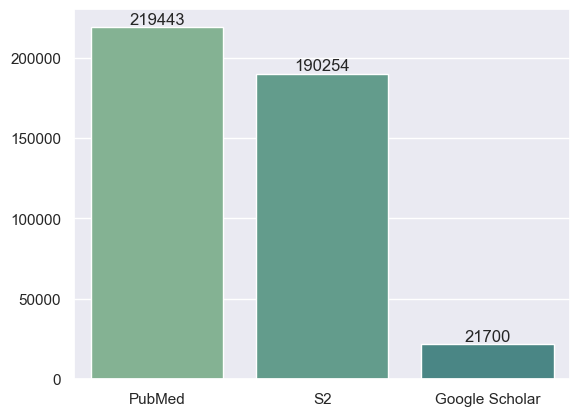

In [50]:
# Es folgt eine Visualisieurng der Anzahl der Wörter, um das Verhältnis noch einmal graphisch darzustellen
# (Weitere Visualisierungen erfolgen hier nicht, da die Hauptauswertung der Textdaten im Bereich des Topic Modeling stattfinden wird!)

sns.set_theme(palette="crest")
ax = sns.barplot(x=["PubMed", "S2", "Google Scholar"], hue=["PubMed", "S2", "Google Scholar"], 
                 y=[words_pubmed, words_s2, words_google], estimator="sum", legend=False)
for container in ax.containers:
    ax.bar_label(container)
plt.savefig(out_dir / "eda_word_counts_per_data_source.png")
plt.show()

---
### Zwischenergebnis der Publikationen 

Aufgrund der Quantität und Qualität der Textdaten hat sich **Pubmed** als beste Quelle erwiesen: 

| Metrik | Anzahl | 
| :-----------------|:---|
| Anzahl Publikationen (nach preprocessing!) | 1.346 | 
| Anzahl Autoren-Coautoren-Paare | 10.327 | 
| Anzahl Wörter aus Titeln, Keywords und Abstracts | 219.443 | 
| Vollständigkeit der PIs | 98% (ein PI musste aufgrund einer erst jüngst erfolgten Neuberufung ausgeschlossen werden) | 

Insb. Google Scholar konnte durch instabiles Scraping und das Fehlen wichtiger Features (Keywords, Abstracts, unvollst. Autoren) nicht genommen werden. Bei S2 ist es so, dass zwar alle PIs abgedeckt waren, dass aber viele Abstracts fehlten, die wichtig sind für das _Topic Modeling_.

## 3. Drittmittel

### Angaben zu den Drittmitteln 

Insgesamt liegen zwei Quellen vor, die im folgenden analysiert werden. 

In [51]:
#Einlesen der Rohdaten 

df_tpf2 = pd.read_excel(folder_tpf / r"raw_data_projects_2003-2025.xlsx", 
                   engine="openpyxl")

print(df_tpf2.info())

# Erste Zeilen 
for x,name in enumerate([df_tpf2]): 
    print("Zeilen aus Datei {}:\n {}".format(name, name.head()))
    print(140*"=")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 42 columns):
 #   Column                                                          Non-Null Count  Dtype         
---  ------                                                          --------------  -----         
 0   Projekt: Id                                                     899 non-null    int64         
 1   Projekt: Status of the process                                  899 non-null    int64         
 2   Projekt: Status of the process2                                 899 non-null    object        
 3   Projekt: Akronym                                                238 non-null    object        
 4   Projekt: Art des Projekts                                       899 non-null    object        
 5   Projekt: DFG-Gepris-ID                                          202 non-null    float64       
 6   Projekt: DFG-Projektnummer                                      209 non-null    float64   

In [52]:
# Weitere Informationen zu den Features und erste statistische Auswertungen

for x,name in enumerate([df_tpf2]): 
    print("Allgemeine Informationen:\n\n {}".format(name.info()))
    print(140*"=", "\n")
    print("Erste statistische Auswertung:\n\n {}".format(name.describe(include="all")))
    print(140*"=", "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 42 columns):
 #   Column                                                          Non-Null Count  Dtype         
---  ------                                                          --------------  -----         
 0   Projekt: Id                                                     899 non-null    int64         
 1   Projekt: Status of the process                                  899 non-null    int64         
 2   Projekt: Status of the process2                                 899 non-null    object        
 3   Projekt: Akronym                                                238 non-null    object        
 4   Projekt: Art des Projekts                                       899 non-null    object        
 5   Projekt: DFG-Gepris-ID                                          202 non-null    float64       
 6   Projekt: DFG-Projektnummer                                      209 non-null    float64   

In [53]:
# Aufbereitung der Dataframes, der fehlenden Werte und Duplikate

df_tpf2 = df_tpf2[["Person: Nachname", "Projekt: Art des Projekts", "Projekt: Titel des Projekts Deutsch", "Projekt: Titel des Projekts Englisch (GB)", 
"Projekt: Stichwörter Deutsch", "Projekt: Stichwörter Englisch (GB)", "Projekt: Projektstart an der Universität Münster", 
"Projekt: Projektende an der Universität Münster", "Projekt: Kurzzusammenfassung Englisch (GB)", "Projekt: Kurzzusammenfassung Deutsch", "Projekt: Langbeschreibung Englisch (GB)",
"Projekt: Langbeschreibung Deutsch"]]

df_tpf2.rename(columns={"Person: Nachname":"nachname", "Projekt: Art des Projekts":"projekt_typ", "Projekt: Titel des Projekts Deutsch":"title_de", 
                        "Projekt: Titel des Projekts Englisch (GB)":"titel_en", "Projekt: Stichwörter Deutsch":"keywords_de", 
                        "Projekt: Stichwörter Englisch (GB)":"keywords_en", "Projekt: Projektstart an der Universität Münster":"start_date",
                        "Projekt: Projektende an der Universität Münster":"end_date", "Projekt: Kurzzusammenfassung Englisch (GB)":"short_abstract_en", 
                        "Projekt: Kurzzusammenfassung Deutsch":"short_abstract_de", "Projekt: Langbeschreibung Englisch (GB)":"long_abstract_en",
                        "Projekt: Langbeschreibung Deutsch":"long_abstract_de"}, inplace=True)

print(df_tpf2.columns)

Index(['nachname', 'projekt_typ', 'title_de', 'titel_en', 'keywords_de', 'keywords_en', 'start_date', 'end_date', 'short_abstract_en',
       'short_abstract_de', 'long_abstract_en', 'long_abstract_de'],
      dtype='object')


C:\Users\felix\AppData\Local\Temp\ipykernel_15244\1368113834.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tpf2.rename(columns={"Person: Nachname":"nachname", "Projekt: Art des Projekts":"projekt_typ", "Projekt: Titel des Projekts Deutsch":"title_de",


In [54]:
print(df_tpf2["projekt_typ"].unique())

['individual project' 'scientific event'
 'participation in BMBF-joint project' 'eu-project hosted outside WWU'
 'subproject in DFG-joint project hosted outside WWU'
 'main project hosted at WWU' 'subproject in other joint projects'
 'subproject in DFG-joint project hosted at WWU'
 'eu-project hosted at WWU' 'WWU-internal funded project'
 'project carried out outside the WWU' 'own resources project'
 'main BMBF-joint project']


In [55]:
##################################
# Fehlende Werte einmal genau eruieren und behandeln
##################################

print("Übersicht des gesamten Df vor der Vorverarbeitung:\n")
print(df_tpf2.info())

# => für das Topic Modeling ist es wichtig, dass die Long Abstracts erhalten bleiben, deswegen wird danach gedropped 
df_tpf2 = df_tpf2.dropna(subset="long_abstract_de")

##################################
# Duplikate eruieren und entfernen 
##################################

# Für df_tpf2 
df_tpf2 = df_tpf2.drop_duplicates(subset="title_de")

##################################
# Einträge bei projekt_typ vereinheitlichen 
##################################

def uniform_project_types(name: str) -> str:
    """
    Diese Funktion vereinheitlicht die Einträge im Feature "projekt_typ". 

    Args: 
    - name: Ein String mit dem ursprünglichen Eintrag 

    Returns: 
    - Ein String mit dem vereinheitlichten Eintrag
    """

    mapping = {
                "eu-project hosted outside WWU": "EU",
                "subproject in DFG-joint project hosted outside WWU": "DFG",
                "main project hosted at WWU": "WWU",
                "individual project": "Individuelles Projekt",
                "subproject in other joint projects": "Sonstiges",
                "subproject in DFG-joint project hosted at WWU": "DFG",
                "participation in BMBF-joint project": "BMBF",
                "WWU-internal funded project": "Sonstiges",
                "eu-project hosted at WWU": "EU",
                "scientific event": "Sonstiges",
                "own resources project": "Sonstiges",
                "project carried out outside the WWU": "Sonstiges",
                "main BMBF-joint project": "BMBF"
    }

    return mapping.get(name, name) 

df_tpf2["projekt_typ_einfach"] = df_tpf2["projekt_typ"].apply(uniform_project_types)

# Abschließende Einsichten
print("Übersicht des gesamten Df nach der Vorverarbeitung:\n")
print(df_tpf2.info())


Übersicht des gesamten Df vor der Vorverarbeitung:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   nachname           715 non-null    object        
 1   projekt_typ        899 non-null    object        
 2   title_de           899 non-null    object        
 3   titel_en           574 non-null    object        
 4   keywords_de        894 non-null    object        
 5   keywords_en        374 non-null    object        
 6   start_date         899 non-null    datetime64[ns]
 7   end_date           841 non-null    datetime64[ns]
 8   short_abstract_en  57 non-null     object        
 9   short_abstract_de  55 non-null     object        
 10  long_abstract_en   385 non-null    object        
 11  long_abstract_de   475 non-null    object        
dtypes: datetime64[ns](2), object(10)
memory usage: 84.4+ KB
None
Übersic

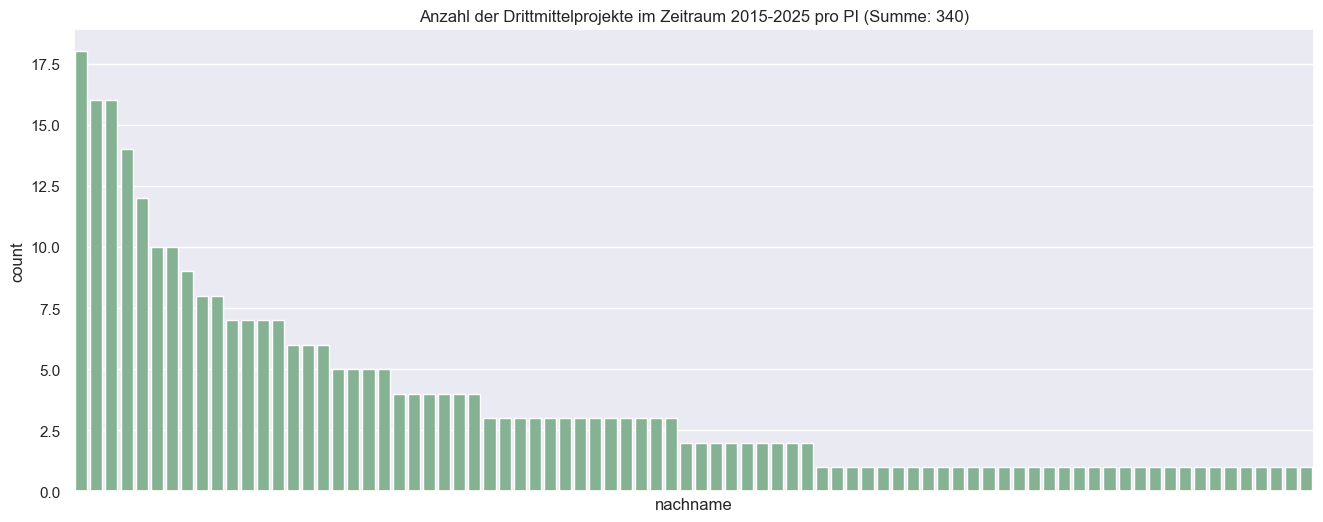

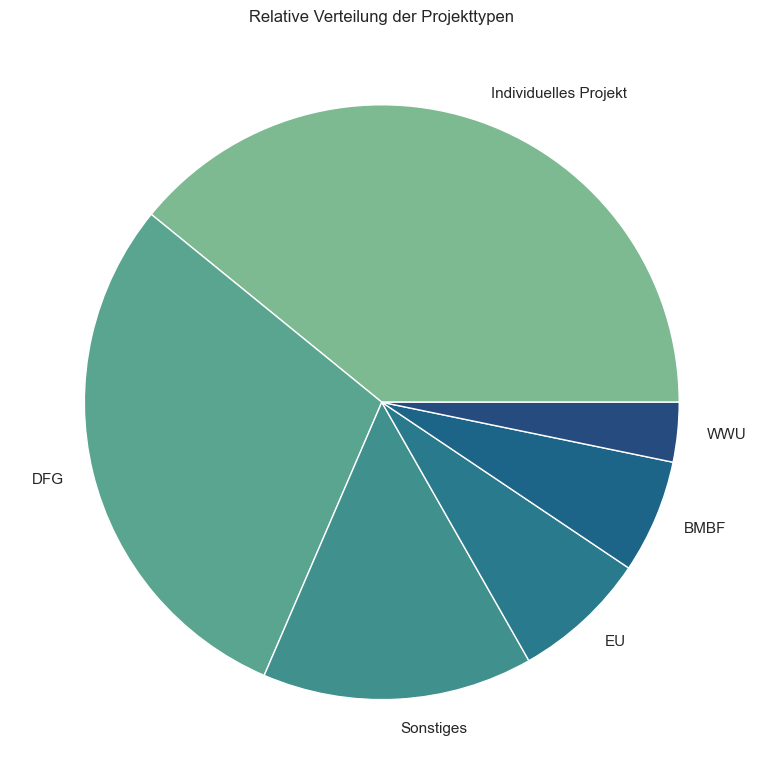

In [56]:
# Visuelle Darstellung und weitere Auswertungen verschiedener Kennzahlen und Verhältnisse 

sns.set_theme(palette="crest")

# Countplot
df_tpf2_sum_ord_final = df_tpf2["nachname"].value_counts().index
plt.figure(figsize=(16, 6))       
sns.countplot(data=df_tpf2, x="nachname", order=df_tpf2_sum_ord_final)
plt.title("Anzahl der Drittmittelprojekte im Zeitraum 2015-2025 pro PI (Summe: {})".format(len(df_tpf2)))
plt.xticks([])
plt.savefig(out_dir / "eda_count_tpf_per_pi.png")
plt.show()

#Pie Plot GG 
plt.figure(figsize=(10, 8))
df_tpf2.value_counts(subset="projekt_typ_einfach").plot(kind="pie", labels=df_tpf2.value_counts(subset="projekt_typ_einfach").index, legend=False) #, rotatelabels=True)
plt.title("Relative Verteilung der Projekttypen")
plt.tight_layout()
plt.yticks([])
plt.ylabel("")
plt.xlabel("")
plt.savefig(out_dir / "eda_tpf_pie_foundations.png")
plt.show()


## Die nächsten Schritte

Die weiteren Analysen und die Verwendung dieser Daten beim spezifischen _Preprocessing_ für die Modelle werden zeigen, welche Defizite es noch gibt. Diese DEfizite werden kann in der Modelloptimierung angegangen und behandelt. 